In [48]:
import pandas as pd
import numpy as np

In [49]:
df = pd.read_csv('/kaggle/input/daily-gym-attendance-and-workout-activity-data/daily_gym_attendance_workout_data.csv')
df.head()

,member_id,visit_date,age,gender,membership_type,workout_type,workout_duration_minutes,calories_burned,check_in_time,attendance_status
0,1,2024-10-11,64,Other,Annual,HIIT,28,171,20:04,Absent
1,2,2024-06-01,65,Female,Quarterly,Strength Training,72,650,19:17,Absent
2,3,2024-06-13,45,Male,Quarterly,Cardio,70,633,7:24,Absent
3,4,2024-02-05,35,Female,Monthly,CrossFit,64,362,7:18,Absent
4,5,2024-07-13,26,Female,Quarterly,Yoga,31,262,11:22,Absent


In [50]:
df.shape

(2600, 10)

In [51]:
df.describe

<bound method NDFrame.describe of       member_id  visit_date  age  gender membership_type       workout_type  \
0             1  2024-10-11   64   Other          Annual               HIIT   
1             2  2024-06-01   65  Female       Quarterly  Strength Training   
2             3  2024-06-13   45    Male       Quarterly             Cardio   
3             4  2024-02-05   35  Female         Monthly           CrossFit   
4             5  2024-07-13   26  Female       Quarterly               Yoga   
...         ...         ...  ...     ...             ...                ...   
2595       2596  2024-07-20   64  Female       Quarterly               Yoga   
2596       2597  2024-05-13   22   Other       Quarterly           CrossFit   
2597       2598  2024-04-27   44    Male       Quarterly           CrossFit   
2598       2599  2024-12-20   62    Male          Annual               HIIT   
2599       2600  2024-04-01   62  Female          Annual  Strength Training   

      workout_dur

In [52]:
df.isnull().sum()

member_id                   0
visit_date                  0
age                         0
gender                      0
membership_type             0
workout_type                0
workout_duration_minutes    0
calories_burned             0
check_in_time               0
attendance_status           0
dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

In [54]:
print(df.dtypes)

member_id                   int64
visit_date                  int64
age                         int64
gender                      int64
membership_type             int64
workout_type                int64
workout_duration_minutes    int64
calories_burned             int64
check_in_time               int64
attendance_status           int64
dtype: object


In [55]:
df.fillna(0, inplace=True)

In [56]:
X = df.drop("age", axis = 1)
y = df["age"]

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [58]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

In [59]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
X_train

,member_id,visit_date,gender,membership_type,workout_type,workout_duration_minutes,calories_burned,check_in_time,attendance_status
760,761,199,1,0,4,63,447,589,0
1620,1621,116,2,0,4,82,440,882,1
2018,2019,300,1,0,4,116,937,14,0
985,986,229,2,2,0,67,601,782,0
1507,1508,223,2,2,4,45,241,116,1
...,...,...,...,...,...,...,...,...,...
1750,1751,268,2,2,1,115,1115,341,0
2101,2102,14,0,2,0,94,572,799,0
1527,1528,333,0,0,0,30,285,165,0
795,796,278,0,1,1,71,640,937,1


In [67]:
y_train

760     43
1620    21
2018    21
985     32
1507    28
        ..
1750    20
2101    65
1527    63
795     52
1903    59
Name: age, Length: 2080, dtype: int64

<Axes: xlabel='gender', ylabel='workout_type'>

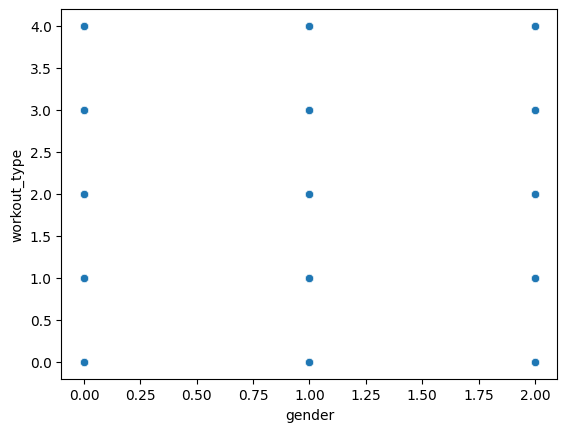

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = df['gender'], y = df['workout_type'])

<Axes: xlabel='calories_burned', ylabel='Count'>

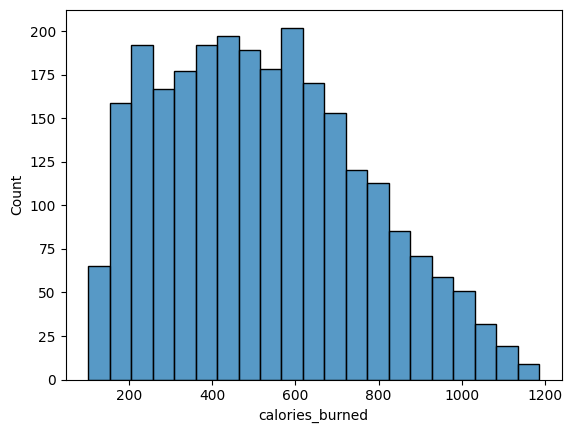

In [69]:
sns.histplot(df['calories_burned'])

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)

In [71]:
print("Accuracy",accuracy_score(y_test, y_pred))

Accuracy 0.019230769230769232


In [72]:
print("Confusion Matrix", confusion_matrix(y_test, y_pred))

Confusion Matrix [[1 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 2 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 1]]


In [73]:
import pickle

pickle.dump(model, open("model.pkl", "wb"))